# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
df=pd.read_csv('/content/haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
df.head()

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

# how many data-points and features?

In [2]:
df.shape

(306, 4)

In [6]:
print(df.columns)

Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')


In [7]:
df["survival_status"].value_counts()
# balanced-dataset vs imbalanced dataset

1    225
2     81
Name: survival_status, dtype: int64



*  Haberman dataset is imbalanced dataset as class 1 contain 225 points and class 2 contain 81 points.






*   There are 306 data points in given dataframe.
*   There are 3 Features and 1 class variable.

**Features**: 

1.   age	
2.   operation_Year
3.   axil_nodes	

**Class**:

class_1 = the patient survived 5 years or longer = (225)

class_2=  the patient died within 5 year = (81)








### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

### **Problem Statement**-
#### The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.So our task is to predict if patients undergone surgery is survived 5years or more or deceased. 

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

# Univariate analysis : -

### Probability density function (PDF) :- 

In [27]:
Survived = df.loc[df['survival_status'] == 1]
Deceased = df.loc[df['survival_status'] == 2]

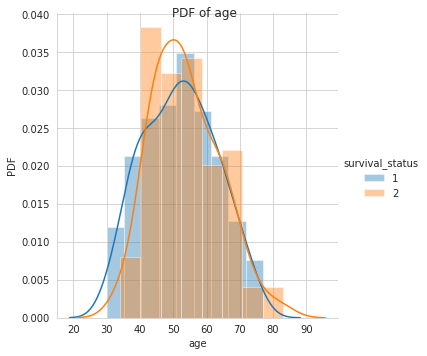

In [35]:
sns.set_style("whitegrid")
grid = sns.FacetGrid(data=df, hue="survival_status", size=5)
grid.map(sns.distplot, "age")
grid.add_legend()
grid.fig.suptitle("PDF of age")
grid.set_ylabels('PDF');

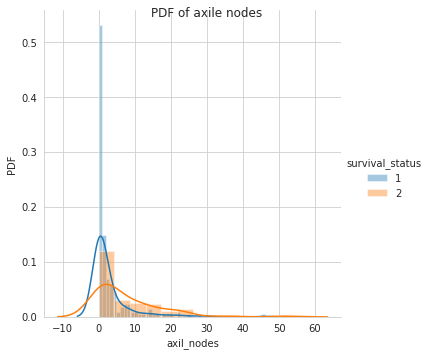

In [33]:
sns.set_style("whitegrid")
grid = sns.FacetGrid(data=df, hue="survival_status", size=5)
grid.map(sns.distplot, "axil_nodes")
grid.add_legend()
grid.fig.suptitle("PDF of axile nodes")
grid.set_ylabels('PDF');

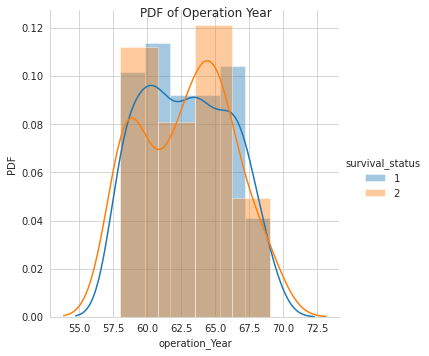

In [34]:
sns.set_style("whitegrid")
grid = sns.FacetGrid(data=df, hue="survival_status", size=5)
grid.map(sns.distplot, "operation_Year")
grid.add_legend()
grid.fig.suptitle("PDF of Operation Year")
grid.set_ylabels('PDF');

#### **Observation**:-
- Age of 40 and above patients are deceased more as well as below 40 age patients are survived more.
- having axil nodes less than 4 then there is higher probability that patient will survived greater than 5 yrs
- survival rate of surgery perform in 60s are the most.

### Cummulative Distribution Function(CDF) :-

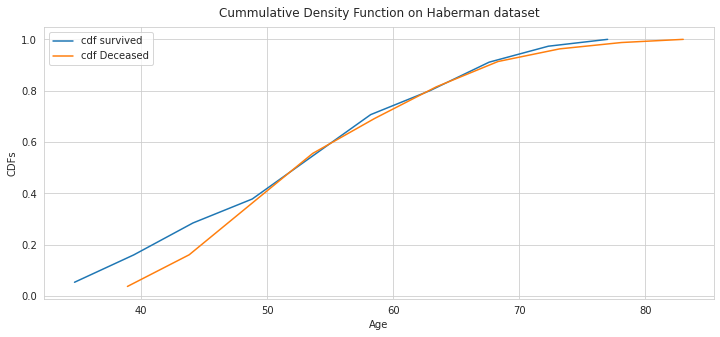

In [41]:
plt.figure(figsize=(12, 5))
counts, bin_edges  = np.histogram(Survived["age"], bins=10, density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label= "cdf survived");


## Deceased
counts, bin_edges  = np.histogram(Deceased["age"], bins=10, density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)


plt.plot(bin_edges[1:], cdf, label= "cdf Deceased")
plt.xlabel("Age")
plt.ylabel("CDFs")
plt.legend()
plt.title("Cummulative Density Function on Haberman dataset", pad=10)
plt.show()

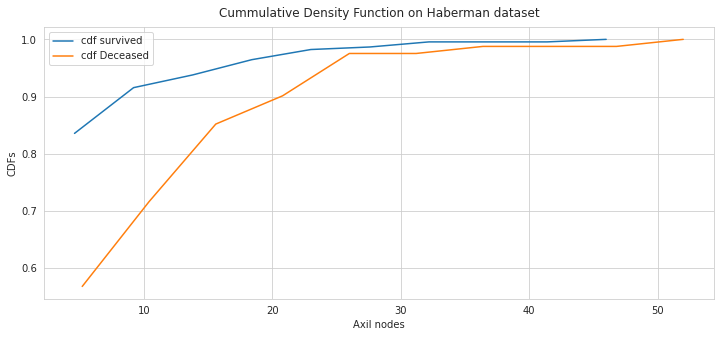

In [42]:
plt.figure(figsize=(12, 5))
counts, bin_edges  = np.histogram(Survived["axil_nodes"], bins=10, density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label= "cdf survived");


## Deceased
counts, bin_edges  = np.histogram(Deceased["axil_nodes"], bins=10, density=True)

pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], cdf, label= "cdf Deceased")
plt.xlabel("Axil nodes")
plt.ylabel("CDFs")
plt.legend()
plt.title("Cummulative Density Function on Haberman dataset", pad=10)
plt.show()

# Boxplots

Text(0.5, 1.0, 'Boxplot on survival_status vs axil nodes detected')

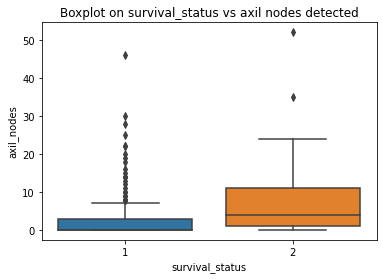

In [11]:
sns.boxplot(x='survival_status',y='axil_nodes',data=df)
plt.title('Boxplot on survival_status vs axil nodes detected')

Text(0.5, 1.0, 'Boxplot on survival_status vs age detected')

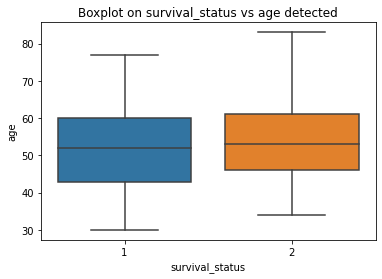

In [12]:
sns.boxplot(x='survival_status',y='age',data=df)
plt.title('Boxplot on survival_status vs age detected')




#### **Observation**:- 
*   75 percentile having node patients survived after surgery.
*   25 percentile having node patients not survived after surgery.
*  Most of the below 40 year of age patients survived after having surgery.

*  patients having above 75 years of age could not survived after surgery.








### Violin plots

Text(0.5, 1.0, 'voilinplot on survival status vs age')

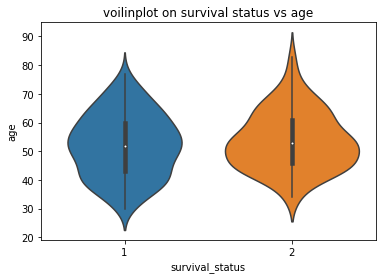

In [14]:
sns.violinplot(x='survival_status',y='age',data=df)
plt.title('voilinplot on survival status vs age')

Text(0.5, 1.0, 'voilinplot on survival status vs axil nodes')

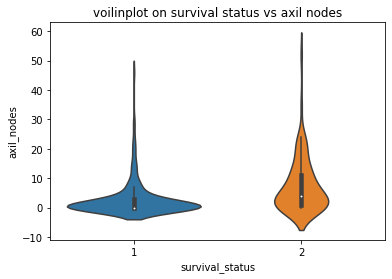

In [19]:
sns.violinplot(x='survival_status',y='axil_nodes',data=df)
plt.title('voilinplot on survival status vs axil nodes')

Text(0.5, 1.0, 'voilinplot on survival status vs operation_Year')

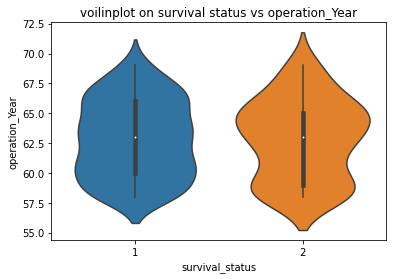

In [16]:
sns.violinplot(x='survival_status',y='operation_Year',data=df)
plt.title('voilinplot on survival status vs operation_Year')

#### **Observation:**-


*   As nodes increases life expentacy decreases.
*   Patients having 30 age have 100 percent survival rate.



### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


## 2D Scatter plots and Pair plots

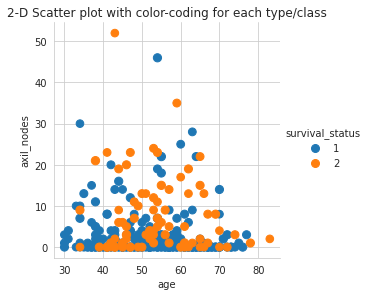

In [20]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="survival_status", size=4) \
   .map(plt.scatter, "age", "axil_nodes",) \
   .add_legend();
plt.title('2-D Scatter plot with color-coding for each type/class')
plt.show()

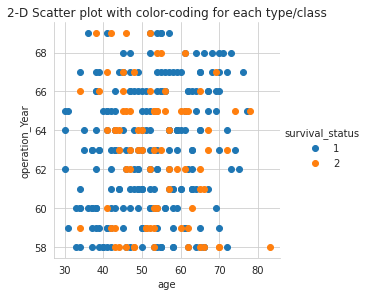

In [21]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="survival_status", size=4) \
   .map(plt.scatter, "age", "operation_Year",) \
   .add_legend();
plt.title('2-D Scatter plot with color-coding for each type/class')
plt.show()

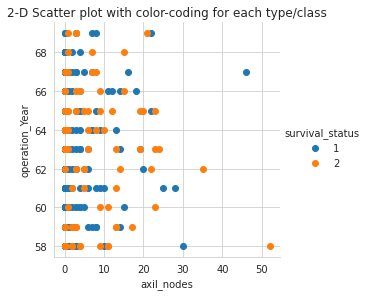

In [22]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="survival_status", size=4) \
   .map(plt.scatter, "axil_nodes", "operation_Year",) \
   .add_legend();
plt.title('2-D Scatter plot with color-coding for each type/class')
plt.show()

#### **Observation**:

*   classes can not be classiefied further analysis required.
*   Scatter plot of age vs axil nodes shows slightly better classification of class1 & class 2.
*   age 30 patients have 100% survival rate.



### Pair plots-

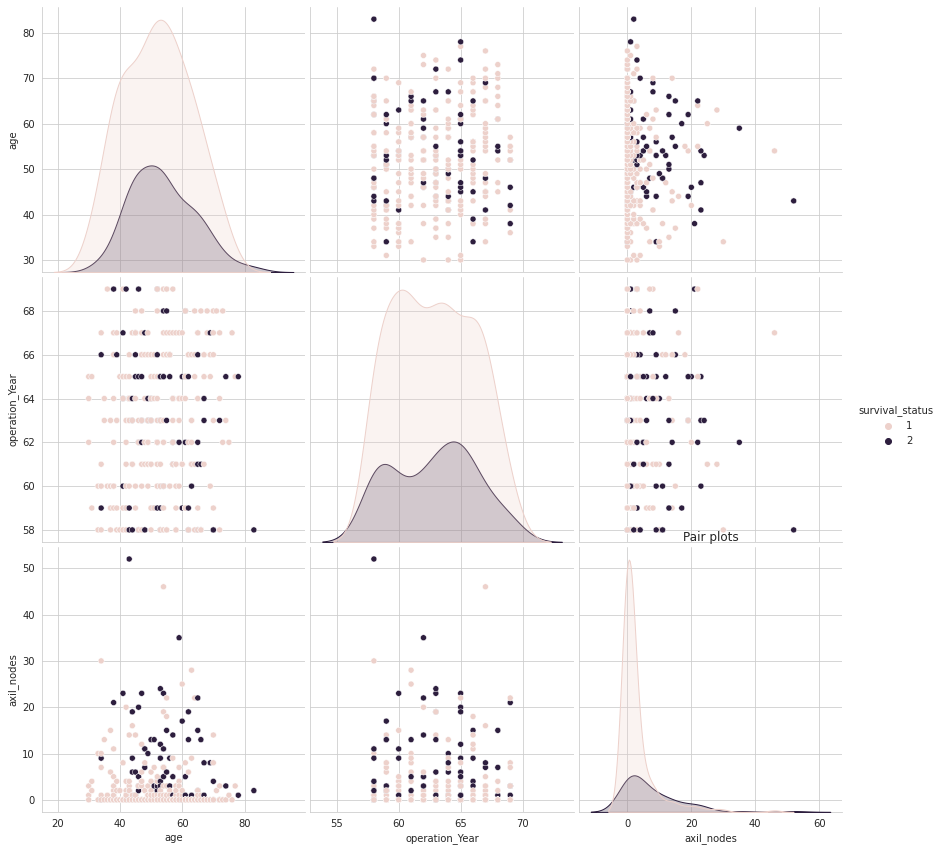

In [24]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="survival_status", size=4);
plt.title('Pair plots')
plt.show()

### **Observation**:-



*   Features age vs axil node looks important because there is cluster of point of class 1 and class 2.
*   Other features combinations does not add much value.



### 1.5 **conclusions of the Exploration**-
- As axile node increases patient survival decreases.
- Patients having Age above 40 have less survival rate after the surgery.
- Haberman dataset is imbalanced database.
-  Age and axil nodes are the important features 
- If patient is old and have more axile node then there is  very less chances of surviving of patient.